In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## 데이터 정제

1. 3개의 파일로 이루어진 데이터 병합 및 정렬
2. "지점명"을 "위도", "경도"로 치환
3. 학습에 필요없는 데이터 삭제 (기상청이 제공하지 않는 데이터)
4. 데이터의 "평균 습도", "평균 풍속", "평균 기온", "평균 토양 수분" 계산 

In [293]:
df_1 = pd.read_csv("data/2019-2024.csv", encoding='euc-kr')
df_2 = pd.read_csv("data/2009-2018.csv", encoding='euc-kr')
df_3 = pd.read_csv("data/1999-2008.csv", encoding='euc-kr')

In [294]:
# 데이터 합치기, 정렬
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df = df.sort_values(by=['지점명', '일시'])

df.to_csv("data/combined_data.csv", index=False, encoding='utf-8-sig')

In [295]:
# 지점명 -> 위도, 경도로 표현
location_info = {
    '강정': {'위도': 33.25992, '경도': 126.48917},
    '대곡': {'위도': 35.24435, '경도': 128.15605},
    '보성군(농)': {'위도': 34.76335, '경도': 127.21226},
    '서산(농)': {'위도': 36.77655689, '경도': 126.49390764},
    '수원(농)': {'위도': 37.25746, '경도': 126.983},
    '안동옥동': {'위도': 36.54983, '경도': 128.6834},
    '오창가곡': {'위도': 36.72455, '경도': 127.46688},
    '익산': {'위도': 35.93807, '경도': 126.99252},
    '철원장흥': {'위도': 38.2016, '경도': 127.25024},
    '춘천신북': {'위도': 37.95461, '경도': 127.77626},
    '화순능주': {'위도': 35.0233, '경도': 126.94961}
}

df['위도'] = df['지점명'].map(lambda x: location_info[x]['위도'])
df['경도'] = df['지점명'].map(lambda x: location_info[x]['경도'])

In [296]:
# 삭제할 데이터 지정 
columns_to_drop = [
    "0.5M 일 지중온도(°C)", 
    "1.0M 일 지중온도(°C)", 
    "1.5M 일 지중온도(°C)", 
    "3.0M 일 지중온도(°C)", 
    "5.0M 일 지중온도(°C)", 
    "일 평균 조도(10lux)", 
    "일 전천복사(MJ/m2)", 
    "일 반사복사(MJ/m2)", 
    "일 지하수위(cm)",
    "최저 초상온도(°C)", 
    "5CM 평균 지중온도(°C)", 
    "30CM 평균 지중온도(°C)",
    "대형증발량(mm)",
    "소형증발량(mm)",
    "0.5M 평균 기온(°C)",
    "4.0M 평균 기온(°C)",
    "50CM 일 토양수분(%)"
]

In [297]:
# 삭제할 데이터 삭제 
df.drop(columns_to_drop, axis=1, inplace=True)

In [298]:
# 평균 습도, 평슌 풍속 
df['평균 습도(%)'] = df[['0.5M 평균 습도(%)', '1.5M 평균 습도(%)', '4.0M 평균 습도(%)']].mean(axis=1)

df.drop(['0.5M 평균 습도(%)', '1.5M 평균 습도(%)', '4.0M 평균 습도(%)'], axis=1, inplace=True)

df['평균 풍속(m/s)'] = df[['1.5M 평균 풍속(m/s)', '4.0M 평균 풍속(m/s)']].mean(axis=1)

df.drop(['1.5M 평균 풍속(m/s)', '4.0M 평균 풍속(m/s)'], axis=1, inplace=True)

In [299]:
# 평군 기온 
df.rename(columns={"1.5M 평균 기온(°C)": "평균 기온(°C)"}, inplace=True)

In [300]:
# 평균 토양수분 구하기
df["토양수분(%)"] = df_1[["10CM 일 토양수분(%)", "20CM 일 토양수분(%)", "30CM 일 토양수분(%)"]].mean(axis=1)

#df.drop(["10CM 일 토양수분(%)", "20CM 일 토양수분(%)", "30CM 일 토양수분(%)"], axis=1, inplace=True)

In [233]:
# 누락된 데이터 삭제
df = df.dropna()

In [234]:
df.to_csv("data/전체 데이터 수정본.csv", encoding="utf-8-sig", index=False)

In [212]:
df["10CM 일 토양수분(%)"].value_counts().sort_index()

10CM 일 토양수분(%)
0.0      71
1.0     299
2.0     174
3.0     254
4.0     275
5.0     171
6.0     238
7.0     276
8.0     262
9.0     244
10.0    282
11.0    332
12.0    320
13.0    397
14.0    380
15.0    323
16.0    317
17.0    350
18.0    314
19.0    317
20.0    326
21.0    278
22.0    247
23.0    247
24.0    233
25.0    216
26.0    229
27.0    228
28.0    223
29.0    158
30.0    124
31.0     85
32.0     66
33.0     43
34.0     43
35.0     40
36.0     23
37.0     17
38.0     25
39.0     48
40.0     18
41.0      3
42.0      1
43.0      1
44.0      1
45.0      1
49.0      1
Name: count, dtype: int64

## 그래프 그리기
1. 최대 습도, 최저 습도의 선택을 위한 시각화

In [301]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [302]:
# '일시' 열을 datetime 형식으로 변환
df['일시'] = pd.to_datetime(df['일시'])

locations = ['강정', '대곡', '보성군(농)', '서산(농)', '수원(농)', '안동옥동', '오창가곡', '익산', '철원장흥', '춘천신북', '화순능주']

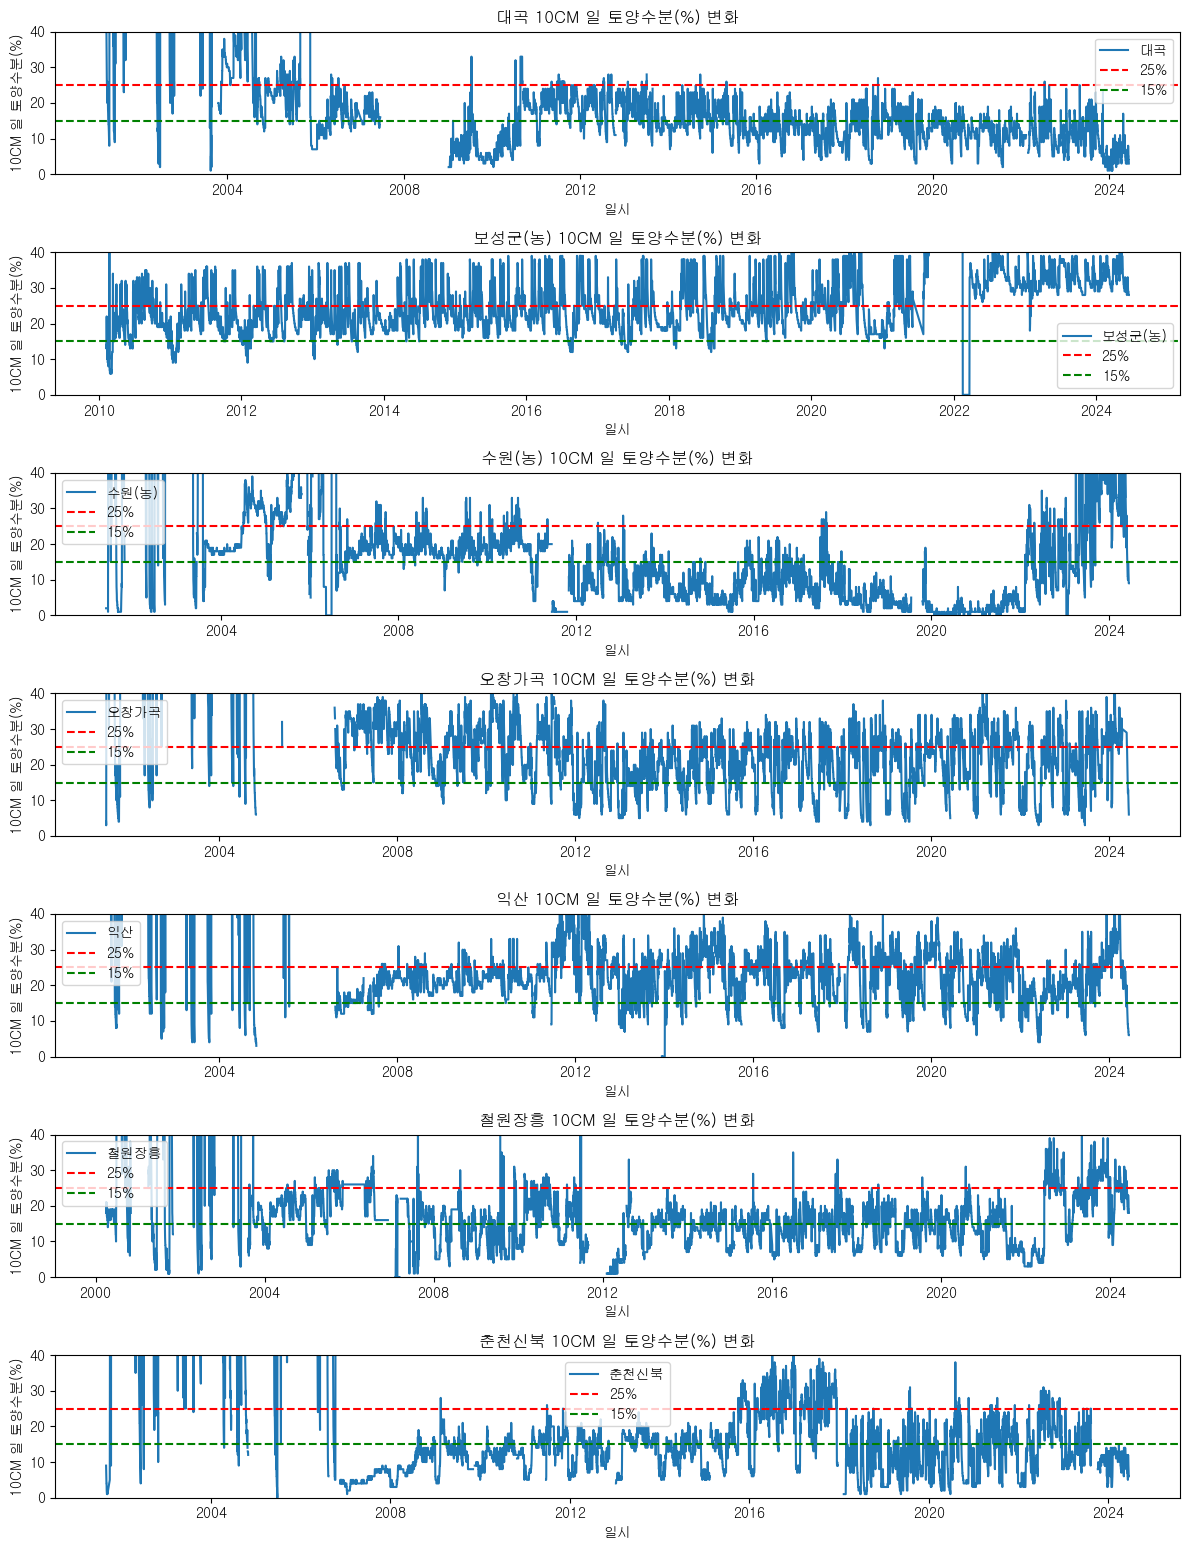

In [308]:
# 그래프 그리기
plt.figure(figsize=(12, 24))

for i, location in enumerate(locations):
    plt.subplot(11, 1, i+1) 
    subset = df[df['지점명'] == location]
    plt.plot(subset['일시'], subset['10CM 일 토양수분(%)'], label=location)

    # 수평선 그리기
    plt.axhline(y=25, color='r', linestyle='--', label='25%')
    plt.axhline(y=15, color='g', linestyle='--', label='15%')
    
    plt.title(f'{location} 10CM 일 토양수분(%) 변화')
    plt.xlabel('일시')
    plt.ylabel('10CM 일 토양수분(%)')
    plt.legend()
    plt.ylim(0,40)

plt.tight_layout()
plt.show()


In [309]:
# 교차점 개수를 저장할 데이터프레임 생성
crossings_data = {location: {y: 0 for y in y_values} for location in locations}

# 각 지점별로 교차점 개수 계산
for location in locations:
    subset = df[df['지점명'] == location]
    
    for y in y_values:
        crossing_points = (subset['10CM 일 토양수분(%)'].shift(1) < y) & (subset['10CM 일 토양수분(%)'] >= y)
        num_crossings = crossing_points.sum()
        crossings_data[location][y] = num_crossings
            
    # 최대 교차점 y값 및 교차점 개수 추가
    max_crossings_info = {
        location: max(crossings_data[location].items(), key=lambda item: item[1])
        for location in locations
    }

# 데이터프레임으로 변환
crossings_df = pd.DataFrame(crossings_data)

In [310]:
max_crossings_info

{'대곡': (16, 264),
 '보성군(농)': (25, 257),
 '수원(농)': (19, 210),
 '오창가곡': (27, 329),
 '익산': (24, 327),
 '철원장흥': (18, 294),
 '춘천신북': (16, 240)}

In [311]:
crossings_df

,대곡,보성군(농),수원(농),오창가곡,익산,철원장흥,춘천신북
0,0,0,0,0,0,0,0
1,0,1,40,0,1,4,1
2,5,1,74,0,1,21,9
3,16,1,81,0,1,22,15
4,38,1,101,4,1,28,39
5,53,1,142,14,7,35,61
6,70,1,150,29,7,53,78
7,85,5,154,50,12,88,100
8,100,2,161,77,22,122,117
9,135,3,162,81,34,144,141


In [307]:
df["10CM 일 토양수분(%)"].value_counts().sort_index()

10CM 일 토양수분(%)
0.0      1008
1.0      1453
2.0       808
3.0      1119
4.0      1742
         ... 
96.0       20
97.0       12
98.0       15
99.0        3
100.0      82
Name: count, Length: 101, dtype: int64